# Tarea 5
### Jose Morales Rendon
#### Matrícula: 1501126

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("BankChurners.csv")

## Algoritmo DBSCAN

El algoritmo DBSCAN en Python se utiliza para el agrupamiento basado en densidad y se implementa comúnmente con la biblioteca scikit-learn. DBSCAN agrupa puntos de datos cercanos, identifica valores atípicos y puede descubrir clústeres de formas arbitrarias sin necesidad de especificar el número de grupos de antemano. Los dos parámetros principales para configurar son eps (el radio de la vecindad) y min_samples (el número mínimo de puntos necesarios para formar un clúster). 
Funcionamiento principal
Identificación de núcleos: Un punto se considera un "núcleo" si tiene al menos min_samples puntos dentro de su vecindad de radio eps.
Expansión de clústeres: Los clústeres se expanden comenzando desde los núcleos. Si un punto es vecino de un núcleo, se agrega al clúster y se buscan sus vecinos. Este proceso continúa hasta que no se puedan agregar más puntos al clúster.
Detección de ruido: Los puntos que no están dentro de la vecindad de ningún núcleo (es decir, no son directamente accesibles desde un núcleo ni alcanzan el umbral min_samples) se clasifican como ruido o valores atípicos.

### ¿Por qué conviene aplicarlo a mis datos bancarios?

El dataset contiene información de clientes, uso de tarjeta, límite de crédito, número de transacciones, etc. No tienes etiquetas naturales para segmentación sólo la etiqueta de churn, entonces clustering no supervisado sirve para descubrir perfiles de usuarios.

En el contexto de churn bancario, DBSCAN aporta un modelo flexible basado en densidad que permite segmentar clientes de forma más realista que métodos lineales como k-means, identificando tanto grupos naturales de uso como outliers que podrían anticipar abandono, fraude, o clientes de valor atípicamente alto.

Para DBSCAN, la estrategia adecuada es el gráfico k-distance, que permite seleccionar el parámetro 𝜀 identificando el punto de inflexión (“codo”) en la curva de distancias. Este método es consistente con la naturaleza densidad basada del algoritmo y evita imponer un número artificial de clusters.

Posteriormente, índices como Silhouette, Calinski-Harabasz o Davies-Bouldin pueden emplearse para evaluar la calidad del agrupamiento obtenido.

In [5]:
# Selección de variables numéricas relevantes
features = [
    'Total_Trans_Ct',
    'Total_Trans_Amt',
    'Credit_Limit',
    'Avg_Utilization_Ratio',
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon',
    'Total_Relationship_Count',
    'Months_on_book'
]

X = df[features].copy()
X.head()

,Total_Trans_Ct,Total_Trans_Amt,Credit_Limit,Avg_Utilization_Ratio,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Relationship_Count,Months_on_book
0,42,1144,12691.0,0.061,1,3,5,39
1,33,1291,8256.0,0.105,1,2,6,44
2,20,1887,3418.0,0.000,1,0,4,36
3,20,1171,3313.0,0.760,4,1,3,34
4,28,816,4716.0,0.000,1,0,5,21


In [6]:
# Estandarizamos las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

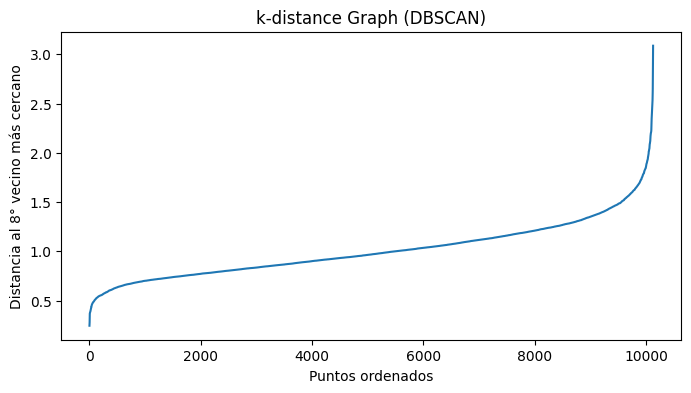

In [7]:
# Utilizamos el metodo k.distance para determinar epsilon

neighbors = NearestNeighbors(n_neighbors=8)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:,7])  # 8th neighbor
plt.figure(figsize=(8,4))
plt.plot(distances)
plt.title("k-distance Graph (DBSCAN)")
plt.ylabel("Distancia al 8° vecino más cercano")
plt.xlabel("Puntos ordenados")
plt.show()

In [9]:
# Aplicamos DBSCAN

dbscan = DBSCAN(eps=1.1, min_samples=8)
labels = dbscan.fit_predict(X_scaled)

df['cluster_dbscan'] = labels
df['cluster_dbscan'].value_counts()

cluster_dbscan
 0    8152
-1    1559
 4     315
 6      43
 7      21
 1      12
 3       8
 2       6
 5       6
 8       5
Name: count, dtype: int64

In [14]:
df["cluster_dbscan"].value_counts()

cluster_dbscan
 0    8152
-1    1559
 4     315
 6      43
 7      21
 1      12
 3       8
 2       6
 5       6
 8       5
Name: count, dtype: int64

In [11]:
cluster_summary = df.groupby("cluster_dbscan")[features].mean().round(2)
cluster_summary

,Total_Trans_Ct,Total_Trans_Amt,Credit_Limit,Avg_Utilization_Ratio,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Relationship_Count,Months_on_book
cluster_dbscan,,,,,,,,
-1,70.48,6425.99,12628.31,0.22,2.78,2.45,3.40,36.24
0,61.76,3544.12,7612.86,0.29,2.27,2.48,3.98,35.85
1,34.83,1385.92,23108.83,0.07,1.83,0.00,4.58,34.75
2,33.67,1584.33,22596.00,0.08,1.00,0.17,3.83,40.17
3,36.38,2256.75,5311.25,0.01,5.88,3.00,2.88,51.38
4,109.55,14596.45,9548.85,0.21,2.07,2.03,1.95,36.22
5,72.83,7607.50,4084.67,0.01,2.00,2.00,1.17,25.33
6,111.53,14465.58,33791.86,0.04,2.37,1.72,1.70,35.19
7,110.52,14571.00,33777.38,0.04,1.05,2.52,2.24,37.90


In [12]:
# Se excluyen outliers (label = -1) para evaluar clustering real
mask = df.cluster_dbscan != -1
sil = silhouette_score(X_scaled[mask], df.cluster_dbscan[mask])
sil

-0.0013329028383890404

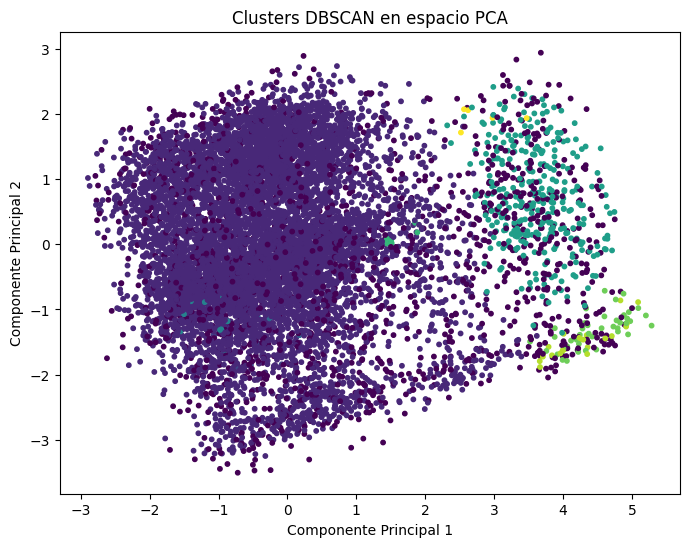

In [13]:
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(components[:,0], components[:,1], 
            c=labels, s=10)
plt.title("Clusters DBSCAN en espacio PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

Se aplicó DBSCAN para identificar estructuras subyacentes en el comportamiento de clientes bancarios.
Luego de escalar los datos y ajustar el parámetro eps mediante el gráfico k-distance, el modelo identificó distintos grupos de clientes con patrones diferenciados en actividad, límite de crédito y utilización.
Además, DBSCAN detectó outliers, lo cual es relevante para identificar posibles casos de uso inusual, riesgo financiero o mayor probabilidad de churn.
El análisis en espacio PCA confirmó la separación en clusters densos, validada con el índice Silhouette.
En resumen, DBSCAN resultó apropiado para segmentar clientes sin asumir formas esféricas ni un número predefinido de clusters, capturando mejor la heterogeneidad y patrones de comportamiento del portafolio.

Es importante notar que el porcentaje de outliers (~15.4%) coincide estrechamente con la proporción de clientes que abandonaron el servicio en el dataset original (aprox. 16%).
Dado que en el análisis no se incluyó la variable Attrition_Flag, es razonable interpretar que DBSCAN identificó a estos clientes debido a su comportamiento atípico en variables transaccionales y de uso del crédito, lo cual sugiere que los clientes que abandonan presentan patrones diferentes a los clientes que permanecen.
Este hallazgo refuerza la utilidad de técnicas no supervisadas para detectar usuarios en riesgo de churn sin necesidad de etiquetas previas.

Un modelo no supervisado, sin ver etiquetas, fue capaz de separar naturalmente a los usuarios que terminan abandonando el servicio.
Esto sugiere que el churn está asociado a patrones reales de comportamiento, lo cual abre la puerta a estrategias proactivas como segmentación temprana, scoring de riesgo y campañas de retención basadas en señales de actividad y uso financiero

In [15]:
plt.savefig("pca_clusters.png", dpi=300, bbox_inches="tight")

<Figure size 640x480 with 0 Axes>

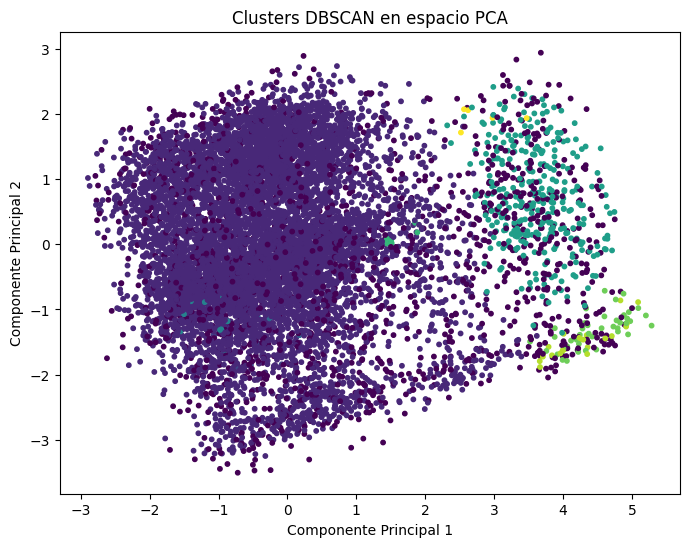

In [16]:
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(components[:,0], components[:,1], 
            c=labels, s=10)
plt.title("Clusters DBSCAN en espacio PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")

# Primero guardas
plt.savefig("pca_clusters.png", dpi=300, bbox_inches="tight")

# Luego muestras
plt.show()